In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader ,random_split
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
import random

C:\Users\yoavl\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def create_torch_dataset():
    all_data = []
    columns = ['Input Voltage', 'Output Voltage', 'Tachometer']
    num_rows = 122824
    for i in range(1, 561):
        temp_df = pd.read_csv(f'PHM09_competition_1/Run_{i}.csv', names=columns, nrows=num_rows)
        temp_tensor = torch.tensor(temp_df.values, dtype=torch.float32)
        # temp_tensor = temp_tensor.unsqueeze(dim=0)
        all_data.append(temp_tensor)
    
    # Stack all tensors to create a single tensor of shape (560, 500000, 3)
    all_data_tensor = torch.stack(all_data, dim=0)
    
    return all_data_tensor

data = create_torch_dataset()

In [14]:
data.shape

torch.Size([560, 122824, 3])

In [33]:
def random_tensor(data, size):
    size = min(size, data.size(0))

    # Randomly select indices for the samples
    selected_indices = torch.randperm(data.size(0))[:size]
    
    # Select and stack the tensors
    selected_tensors = data[selected_indices]
    return selected_tensors
    
def tensor_to_df(data , index):
    tensor_data = data[index]
    numpy_data = tensor_data.numpy()
    columns = ['Input Voltage', 'Output Voltage', 'Tachometer']
    return pd.DataFrame(numpy_data, columns=columns)



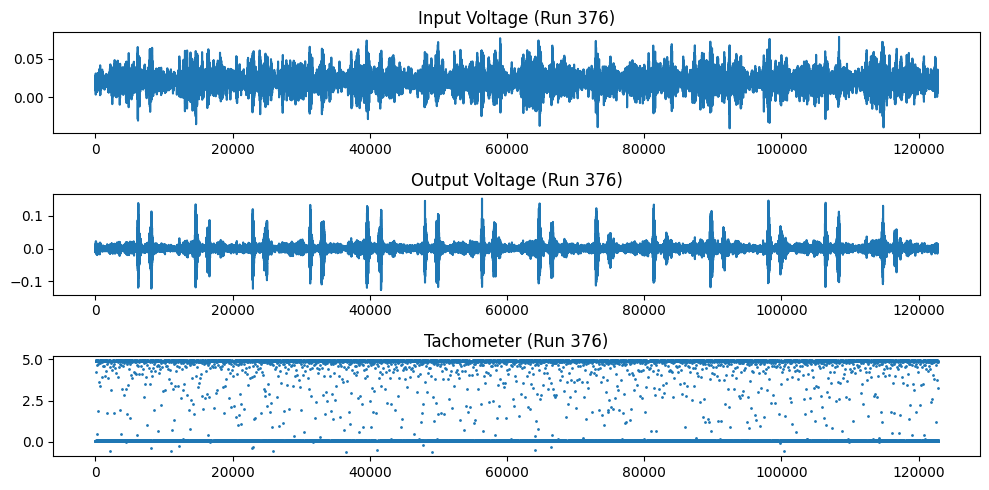

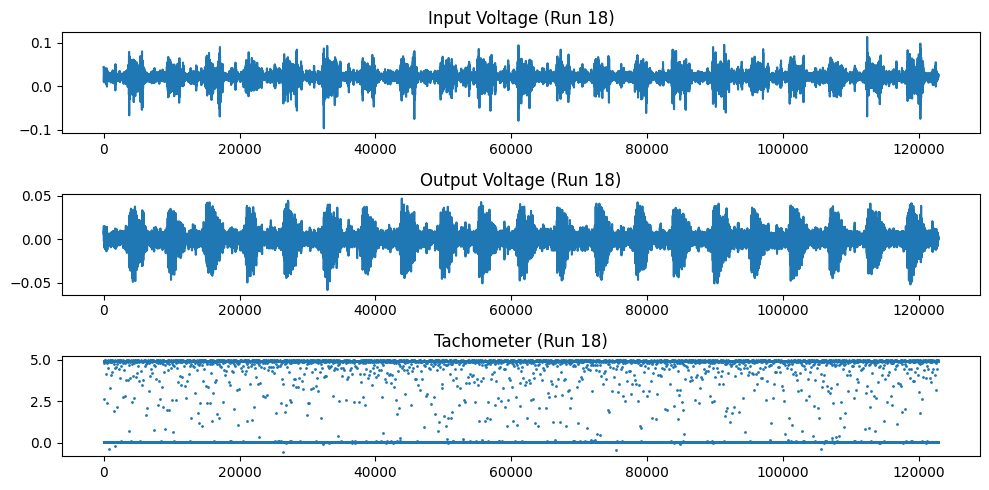

In [34]:
def plot_time_series(data, size=1):
    """
    Creates multiple plots from different data samples, each plot in a new row.
    :param data: Tensor containing all runs data.
    :param size: Number of plots to create.
    """
    for i in range(size):
        # Select a random sample
        random_index = random.randint(1, 540)  # Adjust the range as per the number of samples available
        df = tensor_to_df(data, random_index)

        # Create a figure for each sample
        fig, axes = plt.subplots(3, 1, figsize=(10, 5))

        # Plot each column in a separate subplot
        axes[0].plot(df['Input Voltage'])
        axes[0].set_title(f'Input Voltage (Run {random_index})')

        axes[1].plot(df['Output Voltage'])
        axes[1].set_title(f'Output Voltage (Run {random_index})')
        
        # Plot 'Tachometer' as a scatter plot
        axes[2].scatter(range(len(df['Tachometer'])), df['Tachometer'], s=1)  # s=1 sets the marker size to 1
        axes[2].set_title(f'Tachometer (Run {random_index})')


        plt.tight_layout()
        plt.show()

plot_time_series(data,2)

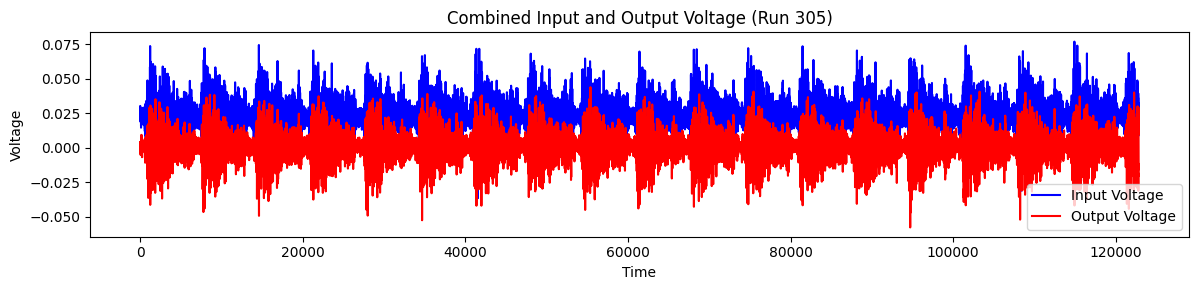

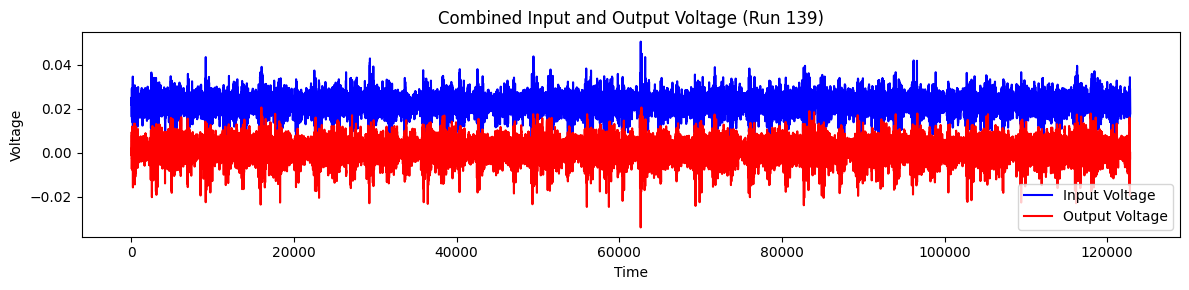

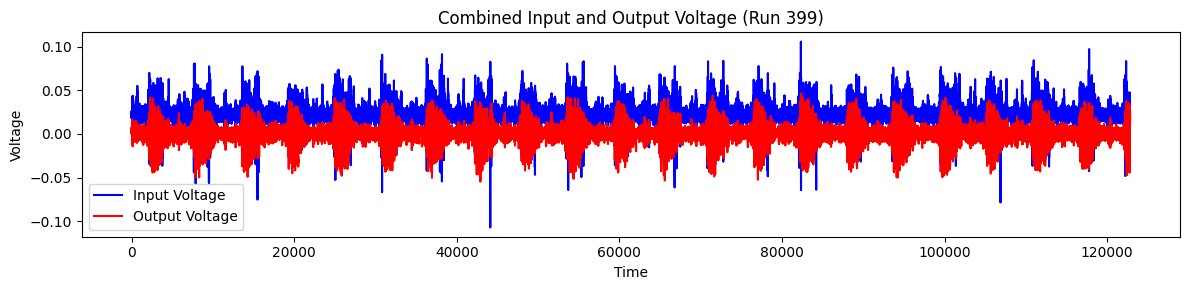

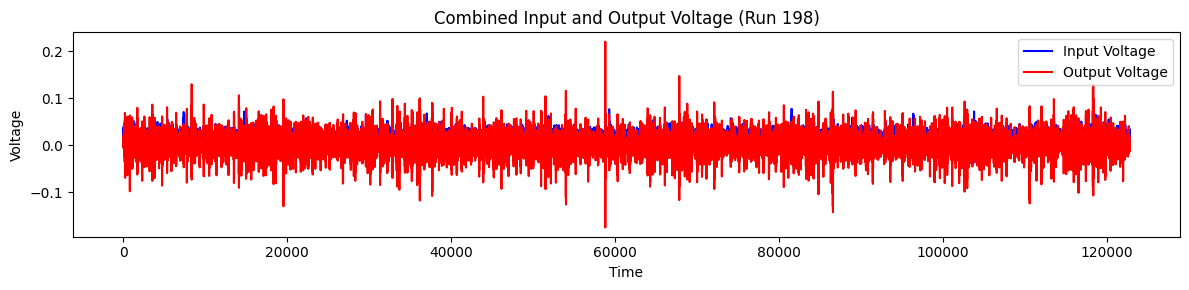

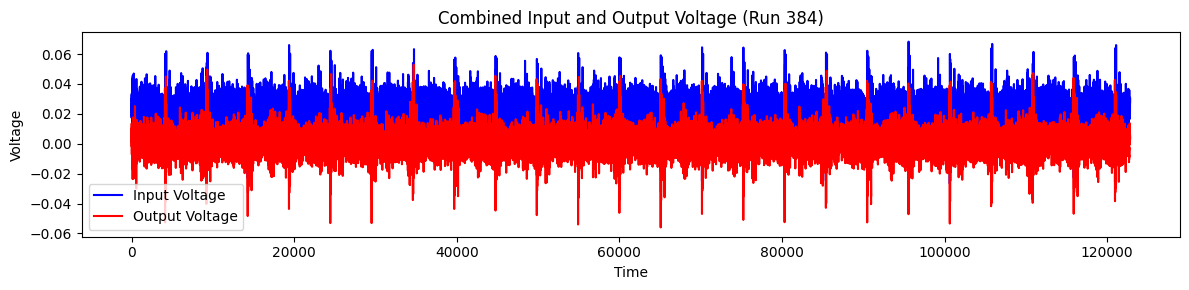

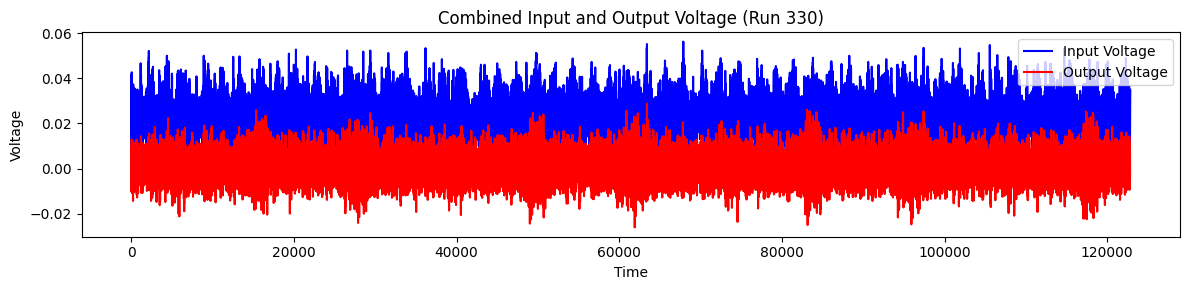

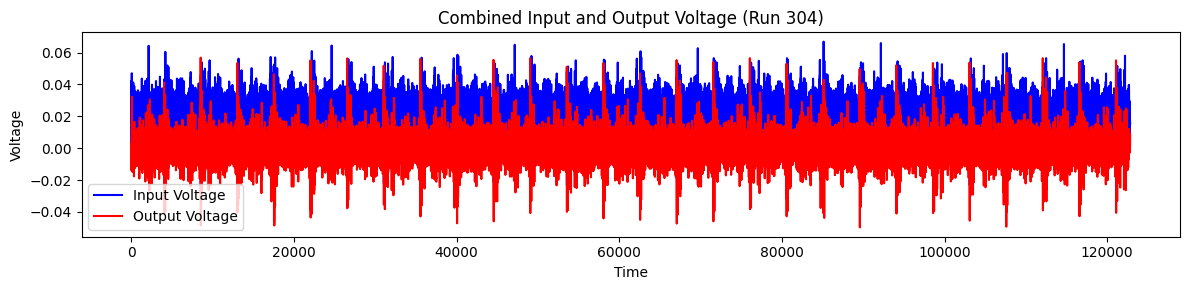

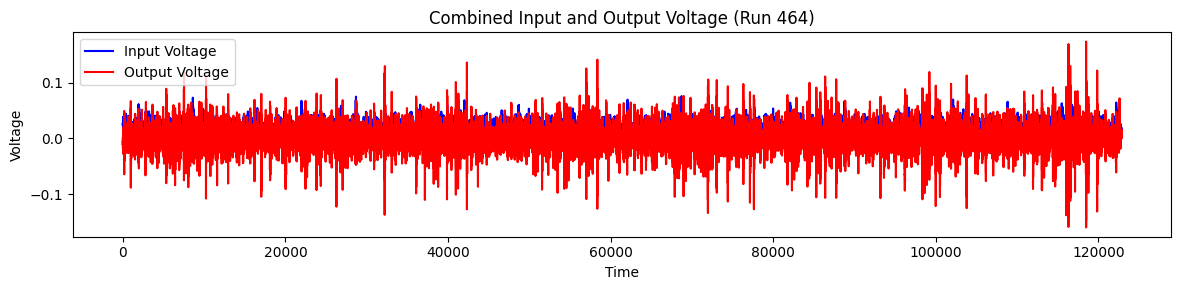

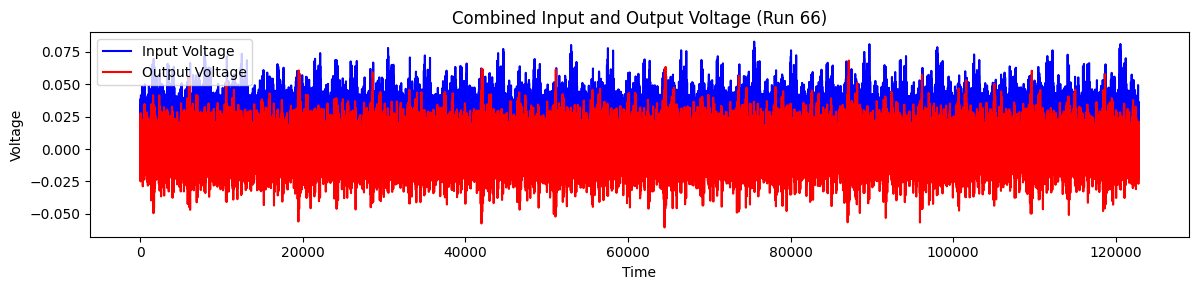

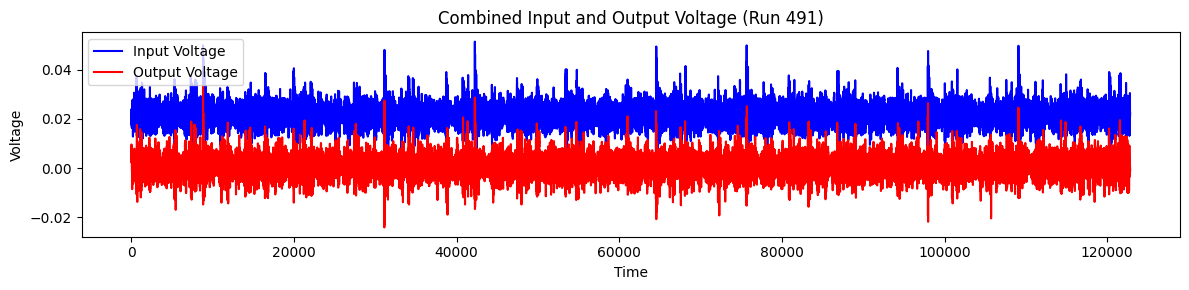

In [32]:
def combined_voltage_plot(data, size=1):
    """
    Creates a plot that combines 'Input Voltage' and 'Output Voltage' for random data samples.
    Each plot will show both voltages, one on top of the other, in different colors.
    :param data: Tensor containing all runs data.
    :param size: Number of plots to create.
    """
    for i in range(size):
        # Select a random sample
        random_index = random.randint(1, 540)  # Adjust the range as per the number of samples available
        df = tensor_to_df(data, random_index)

        # Create a figure for each sample
        plt.figure(figsize=(12, 3))

        # Plot 'Input Voltage' and 'Output Voltage' on the same plot with different colors
        plt.plot(df['Input Voltage'], label='Input Voltage', color='blue')
        plt.plot(df['Output Voltage'], label='Output Voltage', color='red')

        plt.title(f'Combined Input and Output Voltage (Run {random_index})')
        plt.xlabel('Time')
        plt.ylabel('Voltage')
        plt.legend()

        plt.tight_layout()
        plt.show()

combined_voltage_plot(data, size=10)


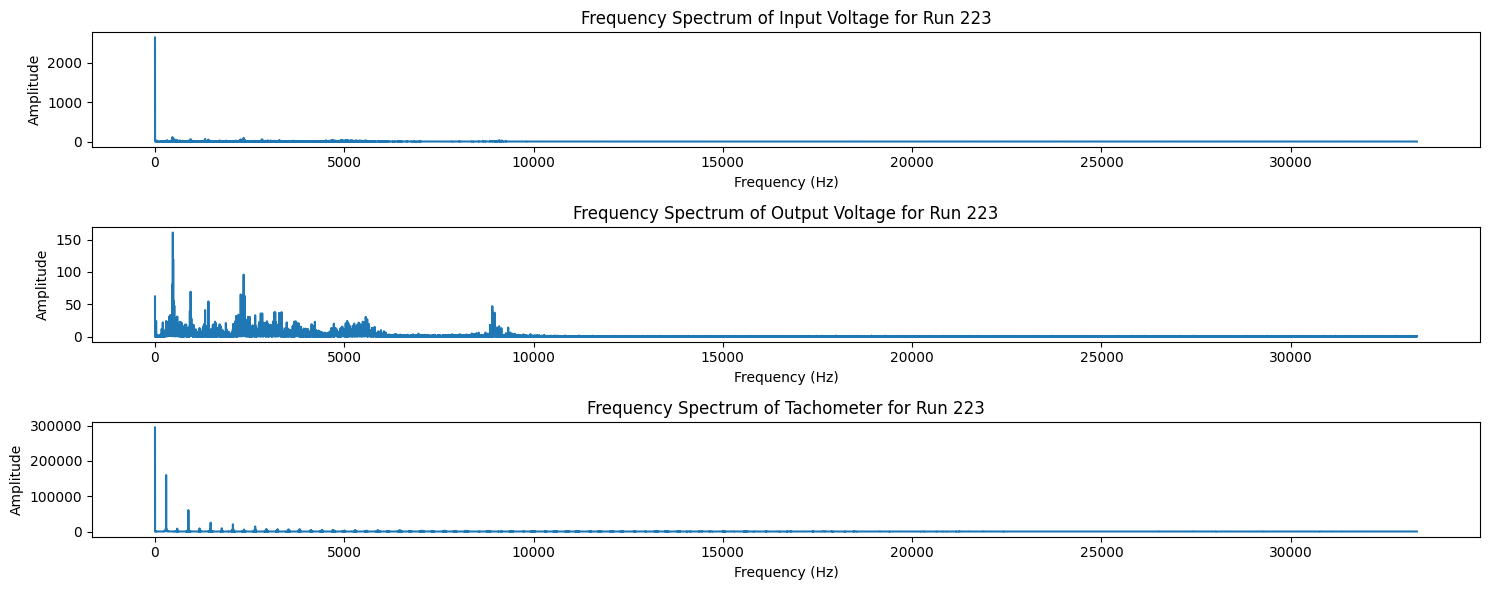

In [50]:
from scipy.fft import fft

# Function to perform frequency domain analysis
def plot_frequency_spectrum(data, columns, sampling_rate):
    """
    Plots the frequency spectrum of the given run number.
    :param data: Tensor containing all runs data.
    :param run_number: The run number to analyze (1 to 560).
    :param columns: List of column names ['Input Voltage', 'Output Voltage', 'Tachometer'].
    :param sampling_rate: Sampling rate of the data.
    """
    run_number = random.randint(1,560)

    run_data = data[run_number - 1].numpy()  # Convert the selected run data to numpy array
    n = run_data.shape[0]

    plt.figure(figsize=(15, 6))
    for i, col in enumerate(columns):
        # Compute the FFT and corresponding frequencies
        fft_values = fft(run_data[:, i])
        freqs = np.fft.fftfreq(n, 1/sampling_rate)

        # Plotting the frequency spectrum
        plt.subplot(len(columns), 1, i + 1)
        plt.plot(freqs[:n // 2], np.abs(fft_values)[:n // 2])  # Only plot the positive frequencies
        plt.title(f'Frequency Spectrum of {col} for Run {run_number}')
        plt.ylabel('Amplitude')
        plt.xlabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()
    
# Sample Rate: 66,666.67 Samples per Second (200 KHz/3).
plot_frequency_spectrum(data, ['Input Voltage', 'Output Voltage', 'Tachometer'], 66666.66)
